In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cic-ids/cleaned_data1.csv')

Data Preprocessing & Feature Selection

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
df = df.head(1000)
df.shape

(1000, 79)

In [ ]:
x = df.drop(columns=['Dst Port','Label'])

In [ ]:
data_scaled = normalize(x)
data_scaled = pd.DataFrame(data_scaled, columns=x.columns)
data_scaled.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6
0,0.485071,1.291896e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.242536,5.998705e-07,0.242536,0.242535,0.0,0.000000e+00
1,0.485071,1.291899e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.242536,4.932956e-07,0.242536,0.242535,0.0,0.000000e+00
2,0.485071,1.291931e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.242536,1.300263e-06,0.242537,0.242535,0.0,0.000000e+00
3,0.593161,1.378598e-06,9.190651e-07,0.000114,0.000209,0.000068,0.0,0.000008,0.000018,0.000090,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,9.190651e-08
4,0.581677,9.249672e-07,7.267599e-07,0.000076,0.000146,0.000049,0.0,0.000005,0.000013,0.000064,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,6.606909e-08


Dendrograms

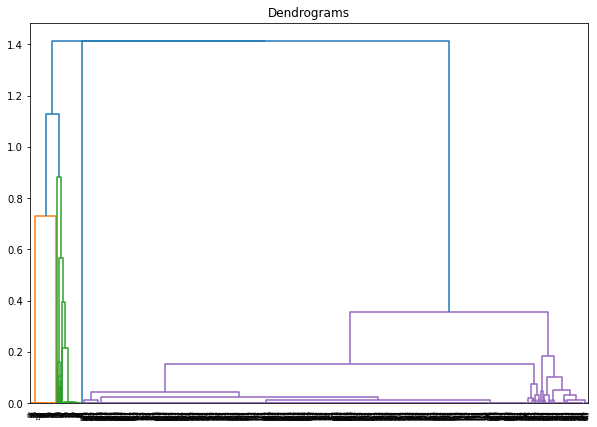

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete', metric='euclidean'))


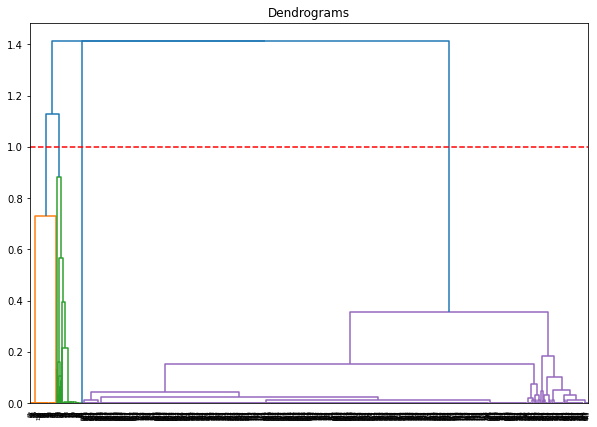

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete', metric='euclidean'))
plt.axhline(y=1, color='r', linestyle='--')

Model Creation

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
pred = cluster.fit_predict(data_scaled)

In [ ]:
print(pred)

[1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 2 1 1 1 1 0 1 0 1 0 1 0 1 1 2 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
predict = cluster.fit(x)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled,pred)

0.9563037813889422